<a href="https://colab.research.google.com/github/Euan-J-Austin/Data_Analytics_and_Intelligence/blob/main/LOGISTIC_REGRESSION_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/.shortcut-targets-by-id/19DFaxKzsTyJQzT1s4FwLYh5D9XB9MI1N/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

In [31]:
df = pd.read_csv('titanic.csv')

In [32]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# TTS

In [33]:
y = df['Survived']
x = df[['Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare']] #all except first

X_train, X_test, y_train, y_test = tts(x, y,
                                       test_size = 0.2,
                                       random_state = 1502)

In [34]:
df = pd.concat([y_train, X_train], axis=1)

In [35]:
def title(t):
  return t.split()[0]

df.Name = df.Name.apply(title)

In [36]:
df.Name.dtype

dtype('O')

# OUTLIERS

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>],
       [<Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

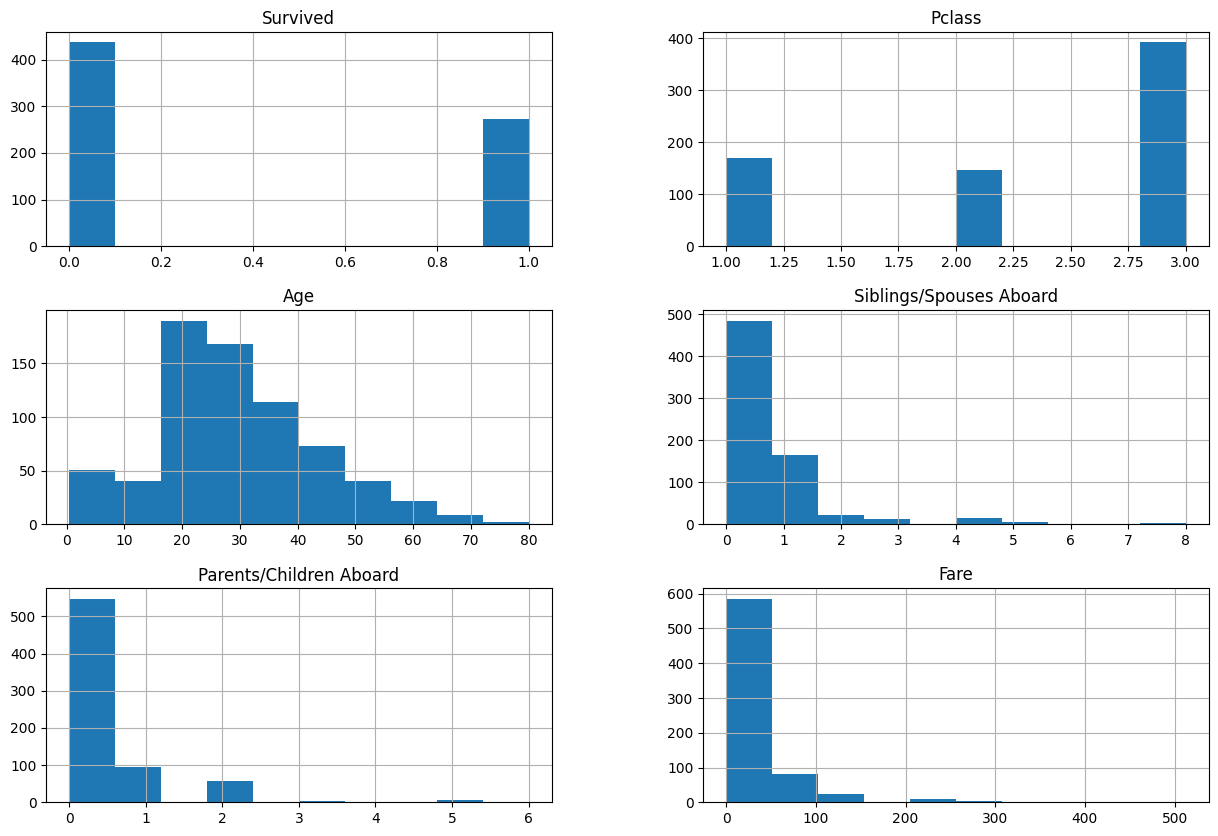

In [37]:
df.hist(figsize = [15,10])

In [38]:
# df = df[df['Fare'] < 300]

# CORRELATION MATRIX

In [39]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

<ipython-input-40-eb366ab85766>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

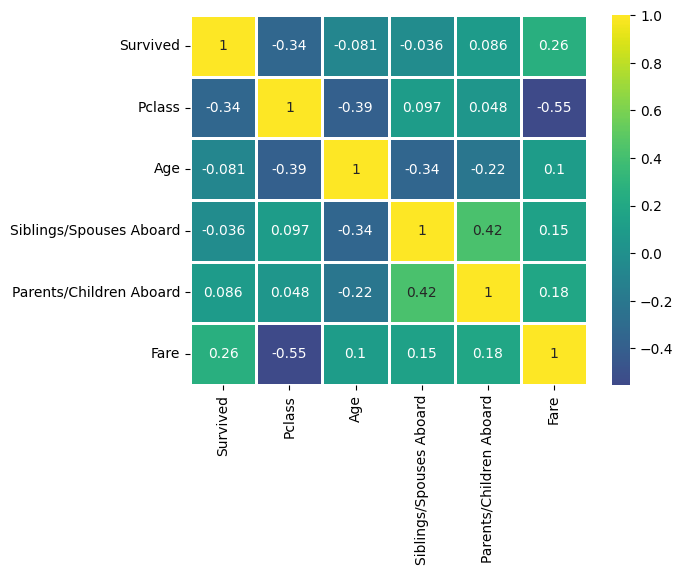

In [40]:
sns.heatmap(df.corr(),
            center = 0,
            cmap = 'viridis',
            annot = True,
            fmt = '.2g',
            linewidths = 1,
            linecolor = 'white')

# DUMMY VARIABLES

Not applied as they weren't statistically signficant or created problems with the Logit model.

In [41]:
# df = pd.get_dummies(data=df, drop_first=True)

In [15]:
# df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_Don.,Name_Dr.,Name_Lady.,Name_Major.,Name_Master.,Name_Miss.,Name_Mlle.,Name_Mr.,Name_Mrs.,Name_Ms.,Name_Rev.,Name_the,Sex_male
457,1,1,48.0,0,0,26.5500,0,0,0,0,0,0,0,1,0,0,0,0,1
331,0,3,16.0,2,0,18.0000,0,0,0,0,0,0,0,1,0,0,0,0,1
161,0,3,26.0,0,0,7.7750,0,0,0,0,0,0,0,1,0,0,0,0,1
545,0,3,33.0,1,1,20.5250,0,0,0,0,0,0,0,1,0,0,0,0,1
721,0,3,20.0,0,0,8.6625,0,0,0,0,0,0,0,1,0,0,0,0,1


# PREPARING VARIABLES

In [43]:
X_train = X_train[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]

In [44]:
y_train = df.Survived
X_train = sm.add_constant(X_train)
X_train.head()

,const,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard
457,1.0,1,48.0,0,0
331,1.0,3,16.0,2,0
161,1.0,3,26.0,0,0
545,1.0,3,33.0,1,1
721,1.0,3,20.0,0,0


# THE MODEL

https://www.quora.com/Im-getting-LinAlgError-singular-matrix-error-while-implementing-statsmodels-logistic-regression-sm-Logit-How-do-I-solve-this-error

GETTING THE CATEGORICAL VARIABLE 'NAME' INTO DUMMIES RESULTED IN COLINEARITY BETWEEN THE TITLES THAT OCCURED FEW TIMES E.G. DON, MLLE., DR. CREATING A SINGULAR MATRIX WHICH IN TURN CAN NOT BE USED IN THE MATHEMATICAL OPERATIONS USED TO CALCULATE A LOGIT MODEL.

In [45]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.567015
         Iterations 6


In [46]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:                  0.1484
Time:                        21:49:57   Log-Likelihood:                -402.01
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 2.685e-29
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.9088      0.469      8.342      0.000       2.990       4.827
Pclass                     -1.2525      0.124    -10.109      0.000      -1.495      -1.010


# PREDICTIONS

In [47]:
X_test = X_test[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]
X_test = sm.add_constant(X_test)

In [48]:
y_test.mean()

0.39325842696629215

It's not unbalanced.

In [49]:
X_test

,const,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard
883,1.0,1,19.0,0,0
613,1.0,3,34.0,1,1
592,1.0,3,36.0,1,1
763,1.0,3,30.5,0,0
830,1.0,3,18.0,0,0
...,...,...,...,...,...
507,1.0,3,29.0,0,0
742,1.0,3,16.0,1,1
796,1.0,2,34.0,0,0
382,1.0,3,27.0,0,0


In [50]:
predictions = model.predict(X_test)
predictions = np.where(predictions >= 0.5, 1, 0) # change threshold to maximise result
predictions[:5]

array([1, 0, 0, 0, 0])

# CONFUSION MATRIX

In [51]:
tn, fp, fn, tp = cm(y_test, predictions).ravel()

#ACCURACY

accuracy = (tp + tn) / len(y_test)

#F1-SCORE

f1 = tp * 2 / (2*tp+fn+fp)

#SPECIFICTY

specificity = tn/tn+fp

#SENSITVITY

sensitivity = tp/tp+fn

print(f'Accuracy is {round(accuracy, 2)}\nF1-score is {round(f1, 2)}\nSpecificty is {specificity}\nSensitivity is {sensitivity}')

Accuracy is 0.65
F1-score is 0.51
Specificty is 25.0
Sensitivity is 39.0


# REPORT

In [52]:
print(cr(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       108
           1       0.57      0.46      0.51        70

    accuracy                           0.65       178
   macro avg       0.63      0.62      0.62       178
weighted avg       0.64      0.65      0.64       178

